## Data prep / Amendments to get lagged directions
## Data Hazırlığı / Gecikmeli Yönlere İlişkin Değişiklikler

In [61]:
import yfinance as yf
import numpy as np 

In [62]:
df=yf.download("AAPL",start="2020-01-01")

[*********************100%***********************]  1 of 1 completed


In [63]:
df["returns"]=np.log(df.Close.pct_change()+1)

In [64]:
df["direction"]=[1 if i >0 else -1 for i in df.returns]

In [65]:
def lagit(df,lags):
    names=[]
    for i in range(1,lags+1):
        df["Lag_"+str(i)]=df["returns"].shift(i)
        df["Lag_"+str(i)+"_dir"]=[1 if j > 0 else -1 for j in df["Lag_"+str(i)]]
        names.append("Lag_"+str(i)+"_dir")
    return names

In [66]:
dirnames=lagit(df,5)

In [67]:
df.dropna(inplace=True)

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
model=LogisticRegression()

In [70]:
model.fit(df[dirnames],df["direction"])

LogisticRegression()

In [71]:
df["prediction_Logit"]=model.predict(df[dirnames])

## Model building, fitting & prediction and Strategy, Performance and Visualization
## Model Oluşturma, Uydurma ve Tahmin İşlemleri ile Strateji, Performans ve Görselleştirme

In [72]:
df["strat_Logit"]=df["prediction_Logit"]*df["returns"]

In [73]:
np.exp(df[["returns","strat_Logit"]].sum())

returns        2.300552
strat_Logit    1.539444
dtype: float64

<Axes: xlabel='Date'>

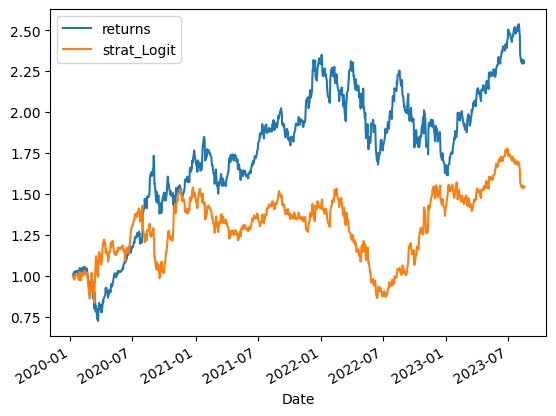

In [74]:
np.exp(df[["returns","strat_Logit"]].cumsum()).plot()

## Train test split
## Eğitim ve Test Verisi Ayırımı

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
train,test=train_test_split(df,shuffle=False,test_size=0.25,random_state=0)

In [77]:
train=train.copy()

In [78]:
test=test.copy()

In [79]:
model=LogisticRegression()

In [80]:
model.fit(train[dirnames],train["direction"])

LogisticRegression()

In [81]:
test["prediction_Logit"]=model.predict(test[dirnames])

In [82]:
test["strat_Logit"]=test["prediction_Logit"]*test["returns"]

In [83]:
np.exp(test[["returns","strat_Logit"]].sum())

returns        1.152771
strat_Logit    1.219968
dtype: float64

<Axes: xlabel='Date'>

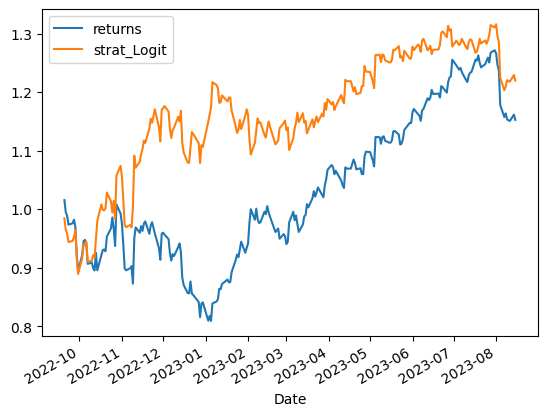

In [84]:
np.exp(test[["returns","strat_Logit"]].cumsum()).plot()

## Confusion Matrix and Classification Report
## Karmaşıklık Matrisi ve Sınıflandırma Raporu






In [85]:
from sklearn import metrics

In [86]:
metrics.confusion_matrix(test["direction"],test["prediction_Logit"])

array([[51, 60],
       [47, 69]], dtype=int64)

In [87]:
print(metrics.classification_report(test["direction"],test["prediction_Logit"]))

              precision    recall  f1-score   support

          -1       0.52      0.46      0.49       111
           1       0.53      0.59      0.56       116

    accuracy                           0.53       227
   macro avg       0.53      0.53      0.53       227
weighted avg       0.53      0.53      0.53       227

